### QED-C Application-Oriented Benchmarks - HamLib Simulation - Plot Observables Metrics

The notebook contains specific examples for the HamLib-based Hamiltonian Simulation benchmark program.
Configure and run the cell below with the desired execution settings.
Then configure and run the remaining cell(s), each one producing a plot illustrating benchmark results.


In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# Settings used when generating the datasets.
max_circuits =1
num_shots = 10000

K = 1             # number of Trotter steps
t = 0.1           # total evolution time

#backend_id="qasm_simulator"
backend_id="statevector_simulator"

api = "qiskit"

In [3]:
# Configure paths to common modules used in this benchmark
import sys
sys.path.insert(1, "_common")

# Configure benchmark library modules
import hamlib_simulation_benchmark
import metric_plots

### List of Available Hamiltonians 
For the plotting illustrate below, select one of the available Hamiltonian name, params tuples.
In the dells at the end of the notebook, we loop over all the Hamiltonians.

In [4]:
# List of HamLib filename and parameter tuples
hamiltonians = [
    ('condensedmatter/tfim/tfim', { "1D-grid": "pbc", "h": 2 }),
    ('condensedmatter/heisenberg/heis', { "1D-grid": "pbc", "h": 2 }),
    ('condensedmatter/fermihubbard/FH_D-1', { "1D-grid": "pbc", "enc": "bk", "U":12 }),
    ('condensedmatter/bosehubbard/BH_D-1_d-4', { "1D-grid": "nonpbc", "enc": "gray", "U":10 }),
    ('binaryoptimization/max3sat/random/random_max3sat-hams', { "ratio": "2", "rinst": "02" }),
    ('chemistry/electronic/standard/H2', { "ham_BK": "" })
    ]

# Select one of the Hamiltonians
hamiltonian_name, hamiltonian_params = hamiltonians[ 1 ]


### Load Metrics Data File for a Specific Hamiltonian
Here we define a function to load the Hamiltonian benchmark data file and extract the metrics of interest. 

In [5]:
def get_data_for_app_backend_group(app_name: str, backend_id: str, group_method: str):
    metrics_array = hamlib_simulation_benchmark.load_app_metrics(app_name, backend_id)

    data = hamlib_simulation_benchmark.query_dict_array(metrics_array, dict(group_method=group_method))

    # pull groups list from the "nvidia" dataset which is the largest
    groups = [m["group"] for m in data]
    
    exp_values_computed = [m["exp_value_computed"] for m in data]
    exp_times_computed = [m["exp_time_computed"] for m in data]

    # move these to their own dataset, instead of being part of computed data
    # pull exact values and times from the dataset; remove null values
    exp_values_exact = [m["exp_value_exact"] for m in data]
    exp_values_exact = [x for x in exp_values_exact if x is not None]
    exp_times_exact = [m["exp_time_exact"] for m in data]
    exp_times_exact = [x for x in exp_times_exact if x is not None]

    return groups, exp_values_computed, exp_times_computed, exp_values_exact, exp_times_exact
    

### Regenerate HamLib Benchmark Standard Plot
Here we invoke the same function that the benchmark uses to generate its plot.  We pass in the metrics of interest.

----- Expectation Value Plot -----


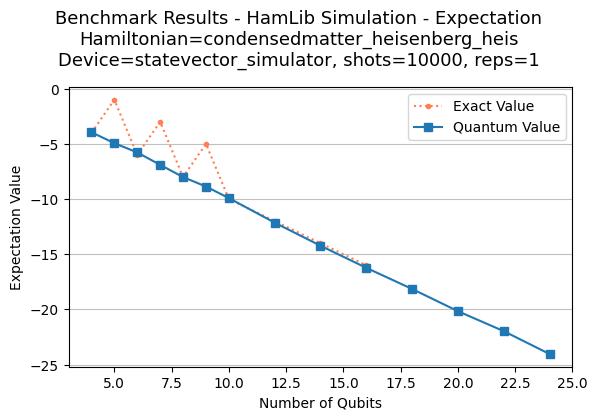

----- Expectation Time Plot -----


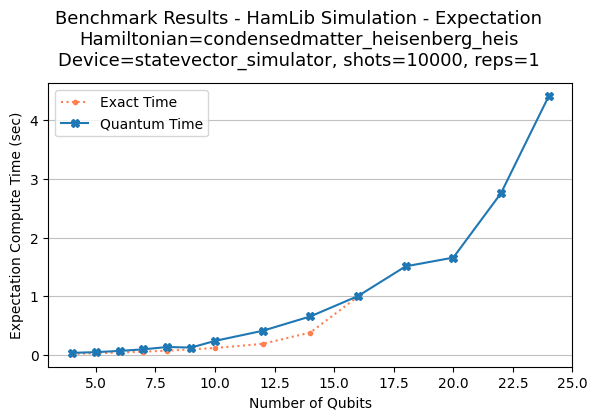

In [6]:
#### expectation value and time plots

# Construct benchmark data file name and load the metrics 
app_name = f"HamLib-obs-{hamiltonian_name}"

metrics_array = hamlib_simulation_benchmark.load_app_metrics(app_name, backend_id)

# pull for statevector_simulator backend

#data_simple = hamlib_simulation_benchmark.query_dict_array(metrics_array, dict(group_method="simple"))
data_N = hamlib_simulation_benchmark.query_dict_array(metrics_array, dict(group_method="N"))

benchmark_name = "HamLib Simulation"

options = { "ham": hamiltonian_name.replace("/", "_"), "gm": "?", "shots":num_shots, "reps": max_circuits  }

suptitle = f"Benchmark Results - {benchmark_name} - Expectation"

hamlib_simulation_benchmark.plot_from_data(suptitle, data_N, backend_id, options)



### Regenerate the Plots using Plot Functions
This example uses functions from the metric_plots module.

----- Expectation Value Plot -----


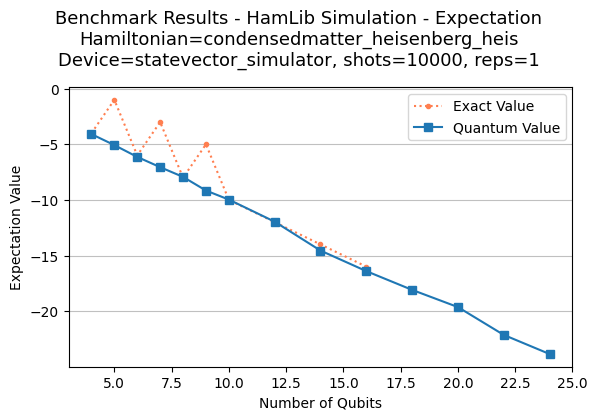

----- Expectation Time Plot -----


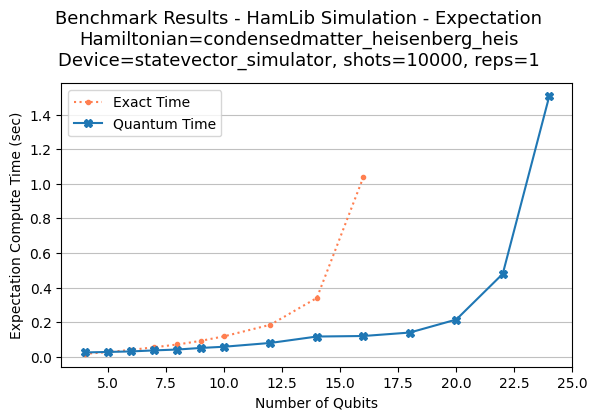

In [7]:
#### expectation value and time plots, using individual functions
benchmark_name = "HamLib Simulation"

groups_simple, exp_values_simple, exp_times_simple, exp_values_exact, exp_times_exact = \
        get_data_for_app_backend_group(app_name, backend_id, "simple")

options = { "ham": hamiltonian_name.replace("/", "_"), "shots":num_shots, "reps":max_circuits  }

suptitle = f"Benchmark Results - {benchmark_name} - Expectation"

# plot all line metrics, including solution quality and accuracy ratio
# vs iteration count and cumulative execution time
metric_plots.plot_expectation_value_metrics(
    suptitle,
    backend_id=backend_id,
    options=options,
    
    groups=groups_simple,
    expectation_values_exact=exp_values_exact,
    expectation_values_computed=exp_values_simple,   
)

# expectation time plot
# plot all line metrics, including solution quality and accuracy ratio
# vs iteration count and cumulative execution time
metric_plots.plot_expectation_time_metrics(
    suptitle,
    backend_id=backend_id,
    options=options,
    
    groups=groups_simple,
    expectation_times_exact=exp_times_exact,
    expectation_times_computed=exp_times_simple,
)


### Produce Multiple Plots from Multiple Datasets
Here, we combine data from several sources.  (so far, we pull all data from a single data file, but this will be enhanced)


*************** ('condensedmatter/tfim/tfim', {'1D-grid': 'pbc', 'h': 2})

----- Expectation Value Plot -----


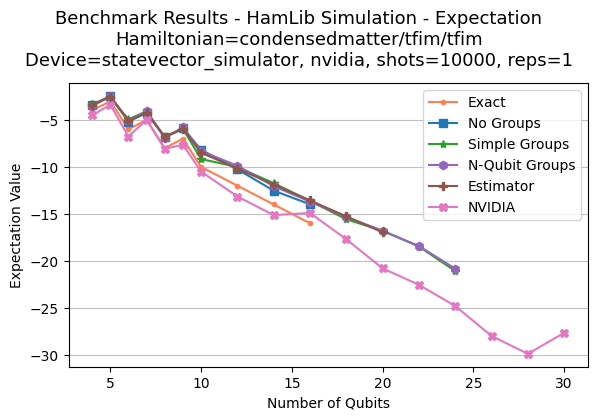

----- Expectation Time Plot -----


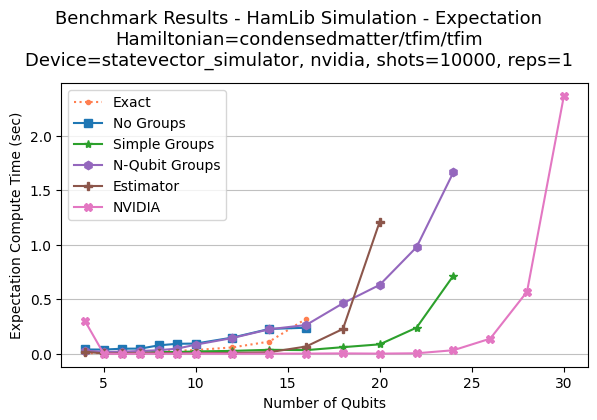


*************** ('condensedmatter/heisenberg/heis', {'1D-grid': 'pbc', 'h': 2})

----- Expectation Value Plot -----


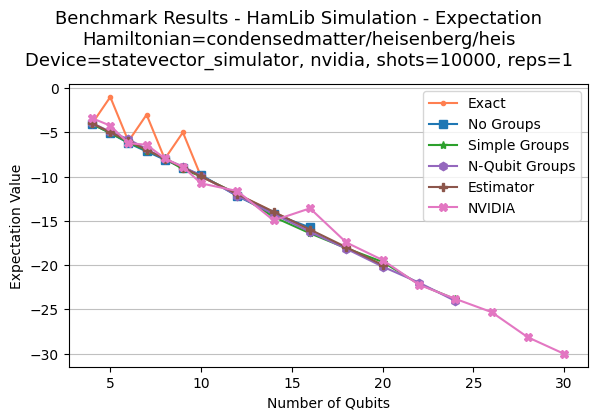

----- Expectation Time Plot -----


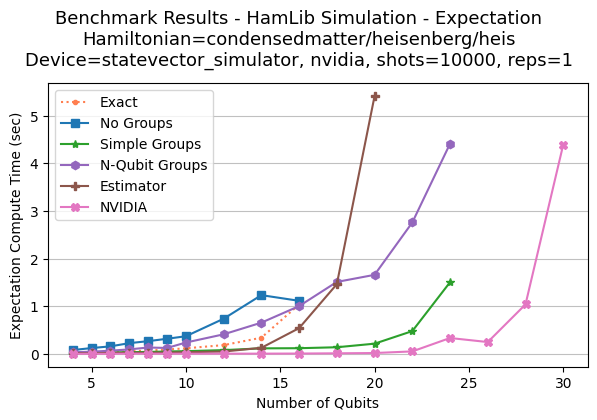


*************** ('condensedmatter/fermihubbard/FH_D-1', {'1D-grid': 'pbc', 'enc': 'bk', 'U': 12})

----- Expectation Value Plot -----


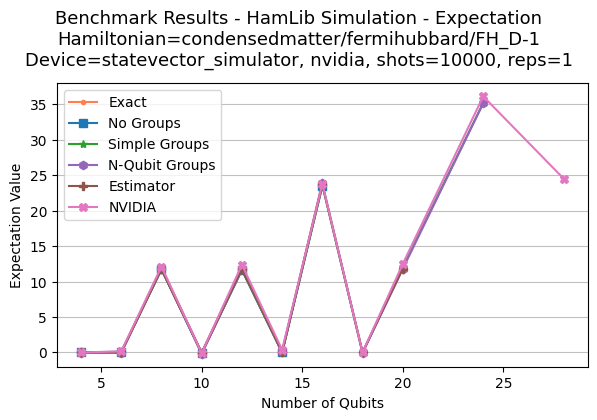

----- Expectation Time Plot -----


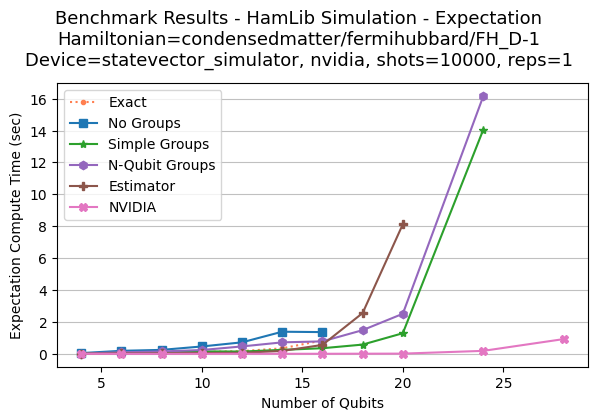


*************** ('condensedmatter/bosehubbard/BH_D-1_d-4', {'1D-grid': 'nonpbc', 'enc': 'gray', 'U': 10})

----- Expectation Value Plot -----


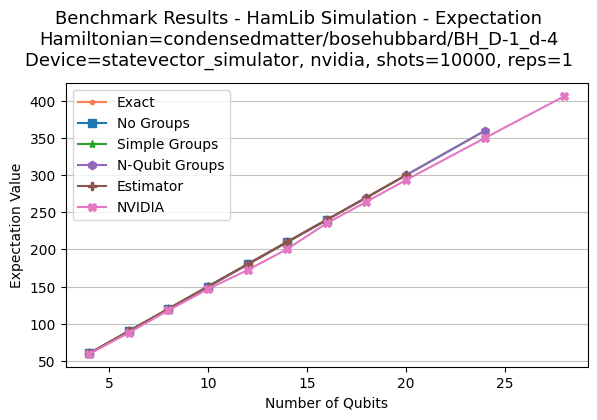

----- Expectation Time Plot -----


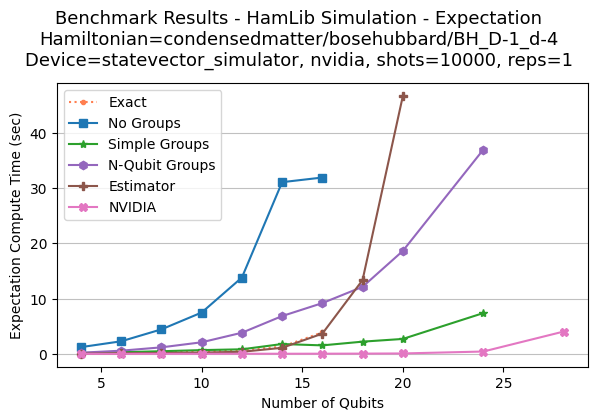


*************** ('binaryoptimization/max3sat/random/random_max3sat-hams', {'ratio': '2', 'rinst': '02'})

----- Expectation Value Plot -----


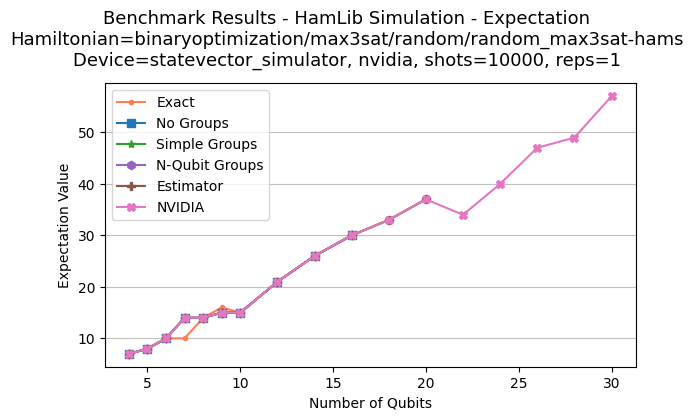

----- Expectation Time Plot -----


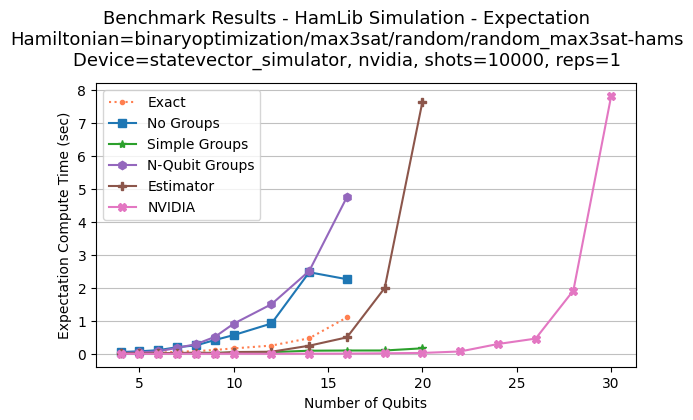


*************** ('chemistry/electronic/standard/H2', {'ham_BK': ''})

----- Expectation Value Plot -----


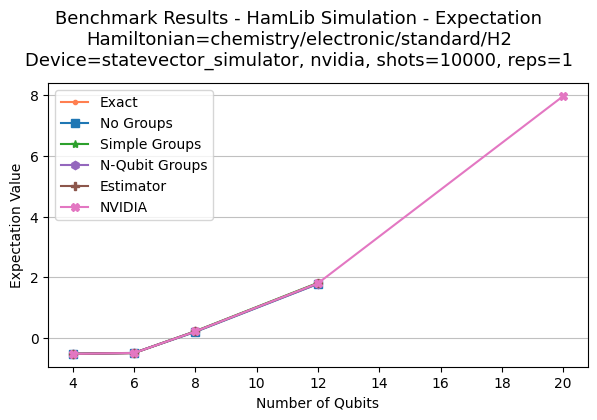

----- Expectation Time Plot -----


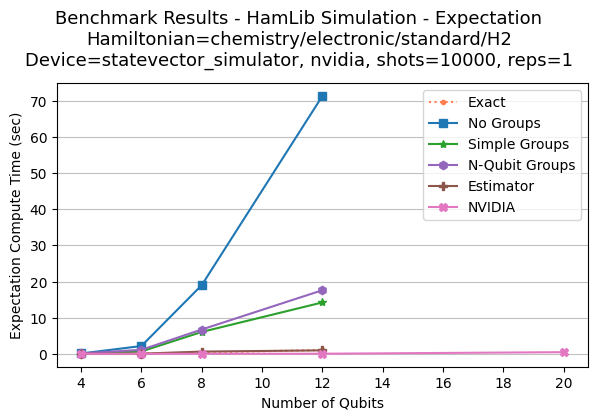

In [8]:
# Select a backend on which the benchmark was executed
backend_id="statevector_simulator"
backend_id_2 = "nvidia"

ham_indexes = range(len(hamiltonians))
#ham_indexes = [2,3]       # select subset for example

for i in ham_indexes:
    
    hamiltonian_name, hamiltonian_params = hamiltonians[ i ]
    print(f"\n*************** {hamiltonian_name, hamiltonian_params}\n")
    
    # Construct benchmark data file name and load the metrics 
    app_name = f"HamLib-obs-{hamiltonian_name}"
       
    #####################################################
    # pull for statevector_simulator and nvidia backends 
    
    groups_simple, exp_values_simple, exp_times_simple, exp_values_exact, exp_times_exact = \
            get_data_for_app_backend_group(app_name, backend_id, "simple")
    
    groups_none, exp_values_none, exp_times_none, _, _ = \
            get_data_for_app_backend_group(app_name, backend_id, None)
    
    groups_N, exp_values_N, exp_times_N, _, _ = \
            get_data_for_app_backend_group(app_name, backend_id, "N")
    
    groups_est, exp_values_est, exp_times_est, _, _ = \
            get_data_for_app_backend_group(app_name, backend_id, "estimator")
    
    groups_nvidia, exp_values_nvidia, exp_times_nvidia, _, _ = \
            get_data_for_app_backend_group(app_name, backend_id_2, None)
    
    # include both statevector and nvidia data in the plot
    labels = [ "Exact", "No Groups", "Simple Groups", "N-Qubit Groups", "Estimator", "NVIDIA" ]
    groups = [ groups_simple, groups_none, groups_simple, groups_N, groups_est, groups_nvidia]
    values = [ exp_values_exact, exp_values_none, exp_values_simple, exp_values_N, exp_values_est, exp_values_nvidia]
    times = [ exp_times_exact, exp_times_none, exp_times_simple, exp_times_N, exp_times_est, exp_times_nvidia]
    
    # select the largest array
    groups = max(groups, key=len) if groups else None
    
    #####################################################
    # create expectation value and time plots
    
    benchmark_name = "HamLib Simulation"
    options = { "ham": hamiltonian_name.replace("/", "_"), "gm": "?", "shots": "?", "reps": 1  }
    
    suptitle = f"Benchmark Results - {benchmark_name} - Expectation"
    suptitle += f"\nHamiltonian={hamiltonian_name}"
    #suptitle += f"\n{hamiltonian_params}"
    suptitle += f"\nDevice={backend_id}{(', ' + backend_id_2) if backend_id_2 else ''}"
    suptitle += f", shots={num_shots}, reps={max_circuits}"
    
    # plot all line metrics, including solution quality and accuracy ratio
    # vs iteration count and cumulative execution time
    metric_plots.plot_expectation_value_metrics_2(
        suptitle,
        backend_id=backend_id,
        options=options,
        
        groups = groups,
        labels = labels,
        values = values  
    )
    
    # expectation time plot
    # plot all line metrics, including solution quality and accuracy ratio
    # vs iteration count and cumulative execution time
    metric_plots.plot_expectation_time_metrics_2(
        suptitle,
        backend_id=backend_id,
        options=options,
        
        groups = groups,
        labels = labels,
        times = times
    )
